In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
def show(title, img):
    plt.figure(figsize=(4,4))
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

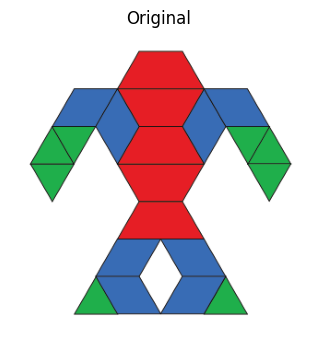

In [5]:
img = cv2.imread("image2.png") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show("Original", img)

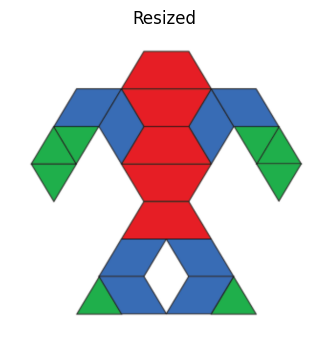

In [6]:
resized = cv2.resize(img, (600, 600))
show("Resized", resized)

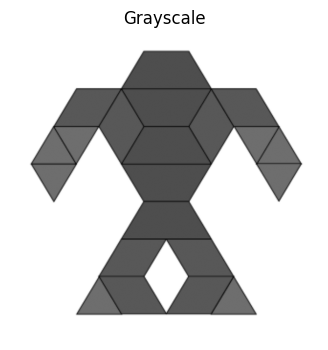

In [7]:
gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
show("Grayscale", gray)

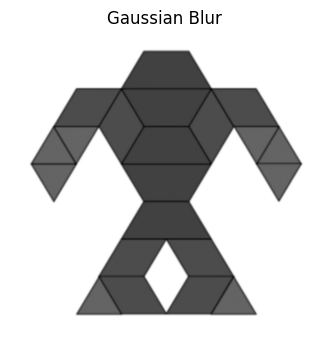

In [8]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)
show("Gaussian Blur", blur)

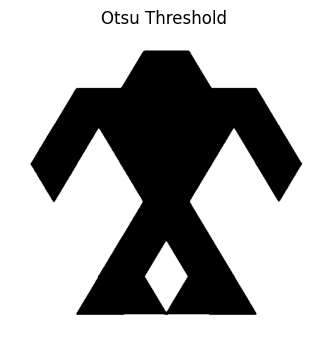

In [9]:
_, otsu = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show("Otsu Threshold", otsu)

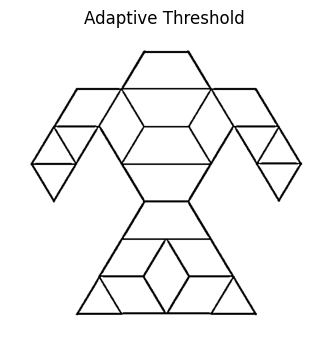

In [10]:
adaptive = cv2.adaptiveThreshold(
    blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11, 2
)
show("Adaptive Threshold", adaptive)

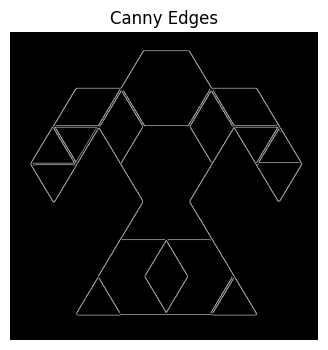

In [11]:
edges = cv2.Canny(blur, 80, 150)
show("Canny Edges", edges)

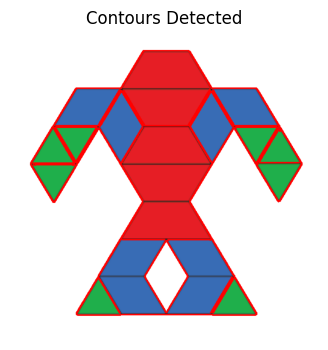

Contours found: 19


In [12]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = resized.copy()
cv2.drawContours(output, contours, -1, (255, 0, 0), 2)
show("Contours Detected", output)
print("Contours found:", len(contours))